# Análisis gridsearch de Delta_global_max, Delta_local_max y Omega_max

Para llevar a cabo este gridsearch de los siete parámetros se han fijado cinco.

* Parámetros referentes a la transición: [1.0, 0.0035, 0.9849, 0.4757]

Se han evaluado 30 puntos por parámetro.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.pylab as plt
import matplotlib.cm as cm
import seaborn as sns

In [3]:
df = pd.read_csv('results_gridsearch_v3.csv')

In [4]:
df.head()

,cost,param0,param1,param2
0,0.000000,0.689655,0.0,0.000000
1,0.320429,0.689655,0.0,0.034483
2,0.221802,0.689655,0.0,0.068966
3,0.243029,0.689655,0.0,0.103448
4,0.218976,0.689655,0.0,0.137931


**Mostramos el mejor resultado**

In [5]:
df[df['cost'] == df.cost.max()]

,cost,param0,param1,param2
20699,0.996329,0.413793,1.0,1.0


**Estudio por parámetro individual**

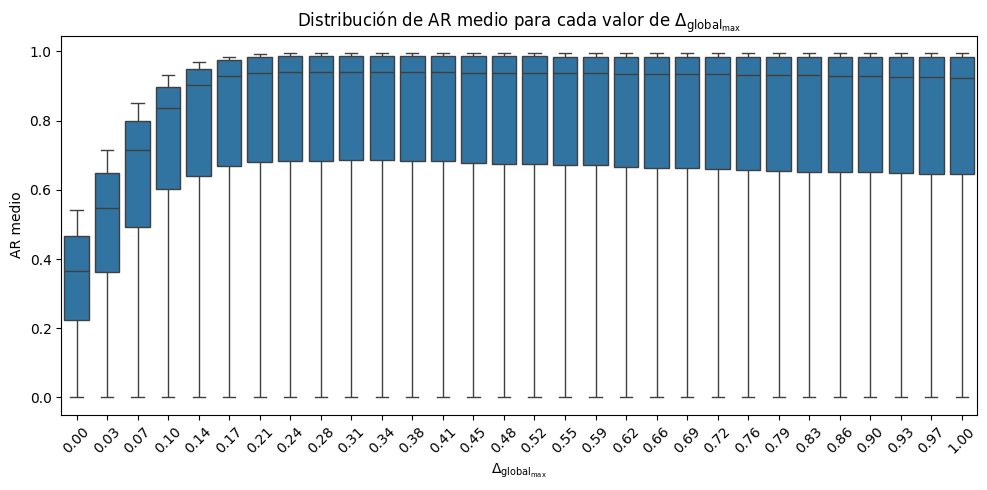

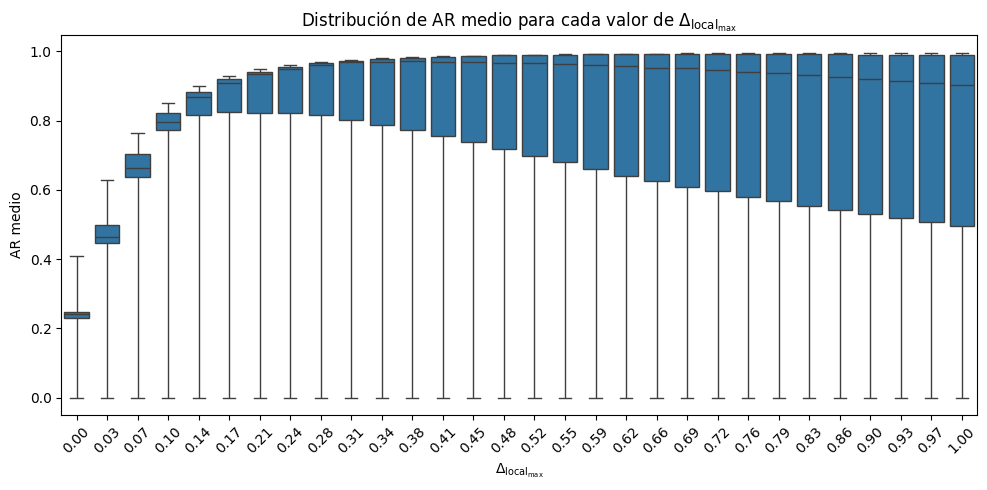

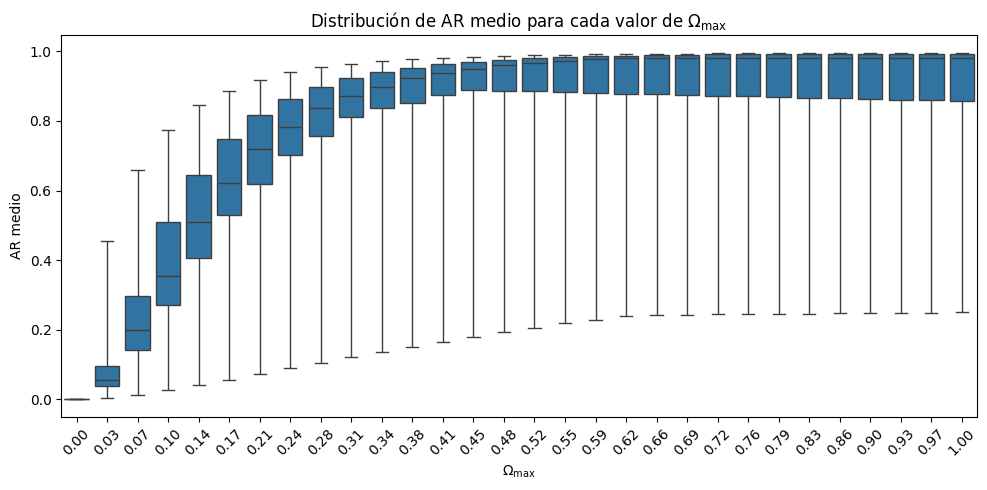

In [13]:
nombres = {
    'param0': r'$\Delta_{\text{global}_\text{max}}$',
    'param1': r'$\Delta_{\text{local}_\text{max}}$',
    'param2': r'$\Omega_{\text{max}}$',
    'cost': 'AR',
}
df2 = df.copy()

for param in ["param0", "param1", "param2"]:
    plt.figure(figsize=(10, 5))
    df2[param] = df2[param].apply(lambda x: "{:.2f}".format(x))
    df2 = df2.sort_values(param)
    # sns.violinplot(data=df2, x=param, y="cost")
    sns.boxplot(data=df2, x=param, y="cost", whis=40)
    # plt.hlines(1,0, 15, 'red', linewidth=1)
    plt.title(f"Distribución de AR medio para cada valor de {nombres[param]}")
    plt.xlabel(nombres[param])
    plt.ylabel("AR medio")
    plt.xticks(rotation=45)  # En caso de que haya muchos valores
    plt.tight_layout()
    plt.show()

**Estudio de parejas de parámetrosa**

In [9]:
# Lista de combinaciones de parámetros a comparar
param_pairs = [("param0", "param1"), ("param0", "param2"), ("param1", "param2")]

df_rounded=df.copy()
df_rounded["param0"] = df_rounded["param0"].round(2)
df_rounded["param1"] = df_rounded["param1"].round(2)
df_rounded["param2"] = df_rounded["param2"].round(2)


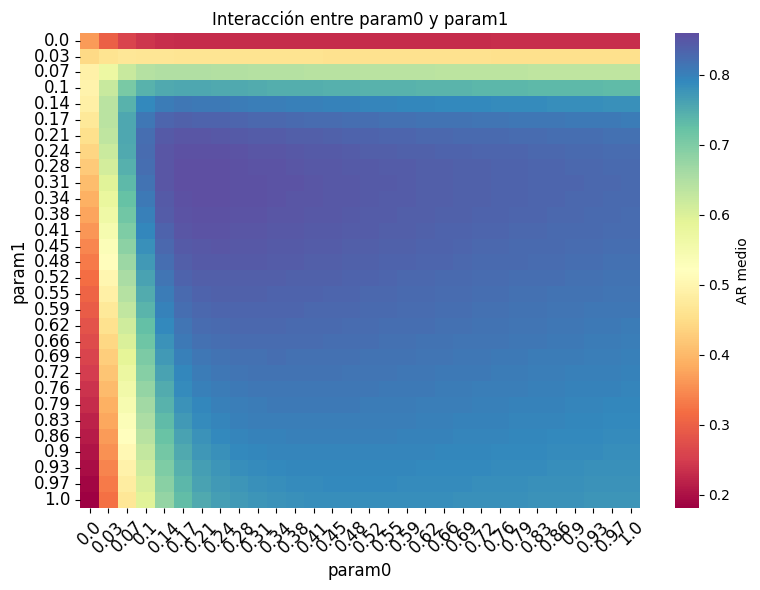

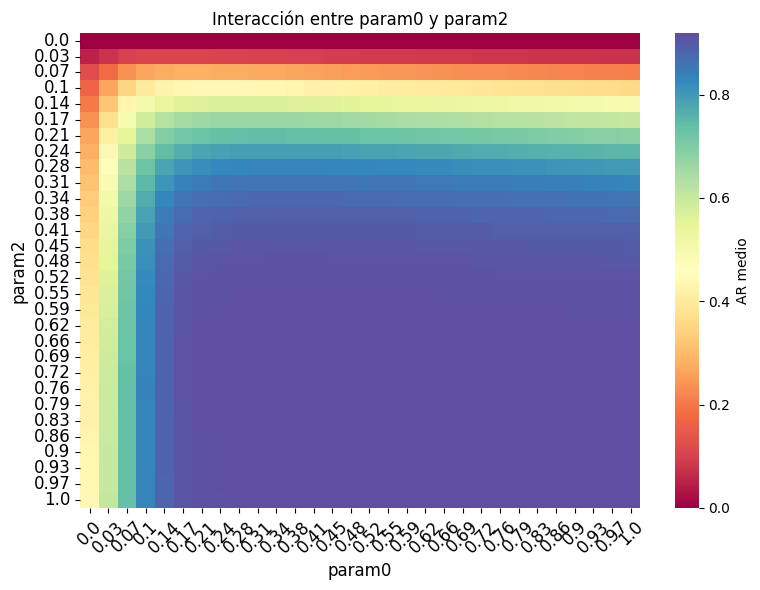

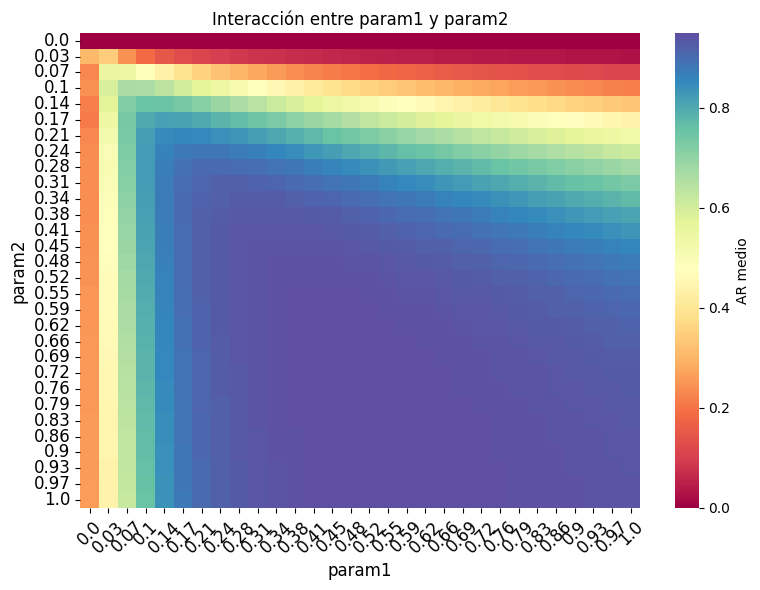

In [11]:
# Graficar un mapa de calor para cada combinación
for x_param, y_param in param_pairs:
    pivot_table = df_rounded.pivot_table(values="cost", index=y_param, columns=x_param, aggfunc="mean")

    plt.figure(figsize=(8, 6))
    sns.heatmap(pivot_table, cmap="Spectral" , cbar_kws={"label": "AR medio"})
    plt.title(f"Interacción entre {x_param} y {y_param}")
    plt.xlabel(x_param, fontsize=12)
    plt.ylabel(y_param, fontsize=12)
    # Aumentar el tamaño de las etiquetas
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

In [14]:
import plotly.graph_objects as go

# Suponemos que ya tienes el DataFrame df
# Seleccionar los parámetros a visualizar
x_param = "param0"
y_param = "param2"

df_f = df[df['param1'] == 1.0]
# Crear tabla pivote
pivot = df_f.pivot_table(values="cost", index=y_param, columns=x_param)
X, Y = np.meshgrid(pivot.columns.values, pivot.index.values)
Z = pivot.values

# Crear figura 3D interactiva
fig = go.Figure(data=[go.Surface(z=Z, x=X, y=Y, colorscale='Spectral')])

fig.update_layout(
    title=f'Superficie 3D de {x_param} vs {y_param}',
    scene=dict(
        xaxis_title=x_param,
        yaxis_title=y_param,
        zaxis_title='cost'
    ),
    width=800,
    height=700
)

fig.show()
